### Budget Allocation vs. Median Income by Neighborhood

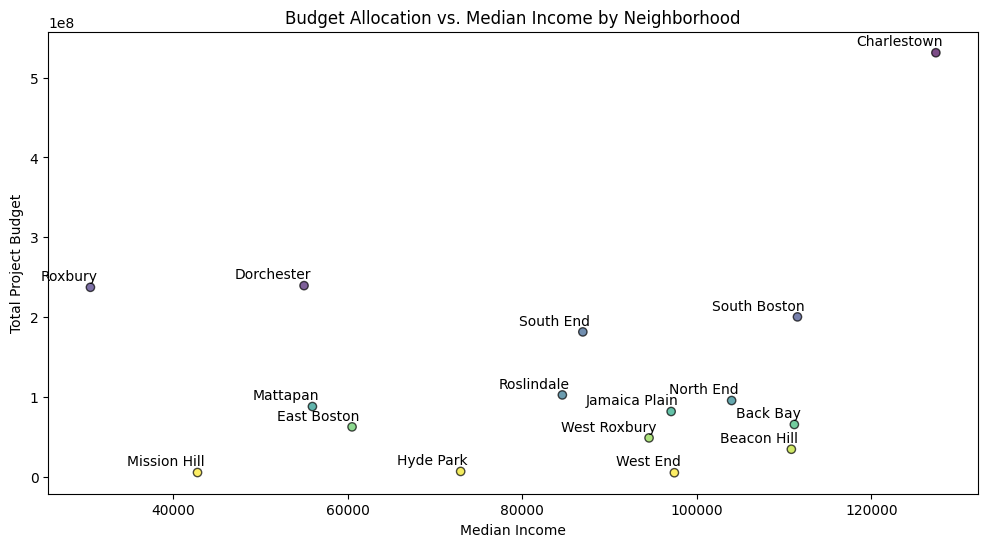

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from matplotlib.colors import Normalize

# Read the budget data from the CSV file
df_budget = pd.read_csv('data/fy24-capital-budget-plan-recommended.csv')
df_budget['Total_Project_Budget'] = df_budget['Total_Project_Budget'].str.replace(',', '')
df_budget['Total_Project_Budget'] = df_budget['Total_Project_Budget'].astype(float)

# Remove "Multiple Neighborhoods" and "Citywide" from the data
df_budget = df_budget[df_budget['Neighborhood'] != 'Multiple Neighborhoods']
df_budget = df_budget[df_budget['Neighborhood'] != 'Citywide']

# Group by neighborhood and sum the total project budget
budget_by_areas = df_budget.groupby('Neighborhood')['Total_Project_Budget'].sum()

# Sort the DataFrame by total project budget in descending order
budget_by_areas = budget_by_areas.sort_values(ascending=False)

# Read the median income data from the CSV file
df_income = pd.read_csv('./data/median_income.csv')

# Merge the budget and median income data on the "Neighborhood" column
merged_data = pd.merge(budget_by_areas.reset_index(), df_income, on='Neighborhood')

# Plotting
plt.figure(figsize=(12, 6))

# Normalize values to be between 0 and 1
norm = Normalize(vmin=0, vmax=len(merged_data))

# Create a colormap with increased saturation and brightness
custom_cmap = cm.viridis(norm(range(len(merged_data))) * 1.2)

# Scatter plot with custom colormap
plt.scatter(
    merged_data['Median Income'],
    merged_data['Total_Project_Budget'],
    c=custom_cmap,
    edgecolors='black',
    alpha=0.7
)

plt.title('Budget Allocation vs. Median Income by Neighborhood')
plt.xlabel('Median Income')
plt.ylabel('Total Project Budget')

# Add labels for each point
for i in range(len(merged_data)):
    plt.annotate(
        merged_data['Neighborhood'].iloc[i],
        (merged_data['Median Income'].iloc[i], merged_data['Total_Project_Budget'].iloc[i]),
        textcoords="offset points",
        xytext=(5, 5),
        ha='right'
    )

plt.show()


The plot indicates a proportional relationship between median income and budget allocation by areas.